<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Prep" data-toc-modified-id="Data-Prep-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Prep</a></span></li><li><span><a href="#MinMax-Normalisation" data-toc-modified-id="MinMax-Normalisation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MinMax Normalisation</a></span></li><li><span><a href="#Dimension-Reduction" data-toc-modified-id="Dimension-Reduction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dimension Reduction</a></span><ul class="toc-item"><li><span><a href="#Principle-Component-Analysis" data-toc-modified-id="Principle-Component-Analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Principle Component Analysis</a></span></li><li><span><a href="#TSNE" data-toc-modified-id="TSNE-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>TSNE</a></span></li><li><span><a href="#Multi-Dimensional-Scaling" data-toc-modified-id="Multi-Dimensional-Scaling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Multi-Dimensional Scaling</a></span></li></ul></li><li><span><a href="#Train-&amp;-Test-sets" data-toc-modified-id="Train-&amp;-Test-sets-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Train &amp; Test sets</a></span></li><li><span><a href="#ML-Models" data-toc-modified-id="ML-Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ML Models</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-Model" data-toc-modified-id="Linear-Regression-Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Linear Regression Model</a></span><ul class="toc-item"><li><span><a href="#Predicted-Top-10-vs-Actual-Top-10" data-toc-modified-id="Predicted-Top-10-vs-Actual-Top-10-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Predicted Top 10 vs Actual Top 10</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Feature Importance</a></span></li></ul></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Neural Network</a></span><ul class="toc-item"><li><span><a href="#Sigmoid-(logistic)" data-toc-modified-id="Sigmoid-(logistic)-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Sigmoid (logistic)</a></span></li><li><span><a href="#Tanh" data-toc-modified-id="Tanh-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Tanh</a></span></li><li><span><a href="#Relu" data-toc-modified-id="Relu-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Relu</a></span></li></ul></li></ul></li></ul></div>

# Data Prep

In [1]:
import os.path
import numpy as np
import pandas as pd
from math import sqrt
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA as sklearnPCA 
from sklearn.manifold import TSNE
from sklearn import manifold,decomposition
from sklearn import metrics

In [2]:
df = pd.read_csv("df.csv",index_col=[0])
df2021 = pd.read_csv("df2021.csv",index_col=[0])

In [3]:
df.head()

,player,avg_driv_dist,driv_acc%,gir%,scrambling%,sandsaves,putting_avg,score,year
0,Tony Finau,316.3,67.86,66.67,79.17,63.64,1.771,-11,2019
1,Rory McIlroy,314.4,58.93,62.50,40.74,25.00,1.689,-5,2019
2,Gary Woodland,313.6,55.36,62.50,51.85,20.00,1.822,-3,2019
3,Brooks Koepka,313.6,69.64,73.61,68.42,100.00,1.792,-12,2019
4,Justin Thomas,312.3,73.21,76.39,70.59,50.00,1.818,-8,2019


In [4]:
df2021.head()

,player,avg_driv_dist,driv_acc%,gir%,scrambling%,sandsaves,putting_avg,score,year
0,Cameron Champ,324.4,71.43,62.50,48.15,20.0,1.822,1,2021
1,Bryson DeChambeau,323.6,55.36,61.11,53.57,20.0,1.841,5,2021
2,Gary Woodland,316.5,58.93,61.11,46.43,0.0,1.773,4,2021
3,Jon Rahm,315.6,75.00,69.44,68.18,75.0,1.840,-6,2021
4,Joaquin Niemann,315.1,58.93,66.67,54.17,100.0,1.854,4,2021


# MinMax Normalisation

In [5]:
norm_df = df[['year','avg_driv_dist', 'driv_acc%', 'gir%', 'scrambling%','sandsaves', 'putting_avg']]
norm_df = norm_df.rename(columns = {'driv_acc%': 'driv_acc'}, inplace = False)
norm_df = norm_df.rename(columns = {'gir%': 'gir'}, inplace = False)
norm_df = norm_df.rename(columns = {'scrambling%': 'scrambling'}, inplace = False)
norm_df.head()

,year,avg_driv_dist,driv_acc,gir,scrambling,sandsaves,putting_avg
0,2019,316.3,67.86,66.67,79.17,63.64,1.771
1,2019,314.4,58.93,62.50,40.74,25.00,1.689
2,2019,313.6,55.36,62.50,51.85,20.00,1.822
3,2019,313.6,69.64,73.61,68.42,100.00,1.792
4,2019,312.3,73.21,76.39,70.59,50.00,1.818


In [6]:
norm_df = norm_df.assign(avg_driv_dist=norm_df.groupby('year')['avg_driv_dist'].transform(lambda x: (x - x.min()) / (x.max()- x.min())))
norm_df = norm_df.assign(driv_acc=norm_df.groupby('year')['driv_acc'].transform(lambda x: (x - x.min()) / (x.max()- x.min())))
norm_df = norm_df.assign(gir=norm_df.groupby('year')['gir'].transform(lambda x: (x - x.min()) / (x.max()- x.min())))
norm_df = norm_df.assign(scrambling=norm_df.groupby('year')['scrambling'].transform(lambda x: (x - x.min()) / (x.max()- x.min())))
norm_df = norm_df.assign(sandsaves=norm_df.groupby('year')['sandsaves'].transform(lambda x: (x - x.min()) / (x.max()- x.min())))
norm_df = norm_df.assign(putting_avg=norm_df.groupby('year')['putting_avg'].transform(lambda x: (x - x.min()) / (x.max()- x.min())))
norm_df.head()

,year,avg_driv_dist,driv_acc,gir,scrambling,sandsaves,putting_avg
0,2019,1.000000,0.500140,0.4444,0.904677,0.6364,0.374372
1,2019,0.956522,0.250070,0.2776,0.146240,0.2500,0.168342
2,2019,0.938215,0.150098,0.2776,0.365502,0.2000,0.502513
3,2019,0.938215,0.549986,0.7220,0.692520,1.0000,0.427136
4,2019,0.908467,0.649958,0.8332,0.735346,0.5000,0.492462


In [7]:
norm_df2021 = df2021[['year','avg_driv_dist', 'driv_acc%', 'gir%', 'scrambling%','sandsaves', 'putting_avg','score']]
norm_df2021 = norm_df2021.rename(columns = {'driv_acc%': 'driv_acc'}, inplace = False)
norm_df2021 = norm_df2021.rename(columns = {'gir%': 'gir'}, inplace = False)
norm_df2021 = norm_df2021.rename(columns = {'scrambling%': 'scrambling'}, inplace = False)
norm_df2021.head()

,year,avg_driv_dist,driv_acc,gir,scrambling,sandsaves,putting_avg,score
0,2021,324.4,71.43,62.50,48.15,20.0,1.822,1
1,2021,323.6,55.36,61.11,53.57,20.0,1.841,5
2,2021,316.5,58.93,61.11,46.43,0.0,1.773,4
3,2021,315.6,75.00,69.44,68.18,75.0,1.840,-6
4,2021,315.1,58.93,66.67,54.17,100.0,1.854,4


In [8]:
norm_df2021 = norm_df2021.assign(avg_driv_dist=norm_df2021.groupby('year')['avg_driv_dist'].transform(lambda x: (x - x.min()) / (x.max()- x.min())))
norm_df2021 = norm_df2021.assign(driv_acc=norm_df2021.groupby('year')['driv_acc'].transform(lambda x: (x - x.min()) / (x.max()- x.min())))
norm_df2021 = norm_df2021.assign(gir=norm_df2021.groupby('year')['gir'].transform(lambda x: (x - x.min()) / (x.max()- x.min())))
norm_df2021 = norm_df2021.assign(scrambling=norm_df2021.groupby('year')['scrambling'].transform(lambda x: (x - x.min()) / (x.max()- x.min())))
norm_df2021 = norm_df2021.assign(sandsaves=norm_df2021.groupby('year')['sandsaves'].transform(lambda x: (x - x.min()) / (x.max()- x.min())))
norm_df2021 = norm_df2021.assign(putting_avg=norm_df2021.groupby('year')['putting_avg'].transform(lambda x: (x - x.min()) / (x.max()- x.min())))
norm_df2021.head()

,year,avg_driv_dist,driv_acc,gir,scrambling,sandsaves,putting_avg,score
0,2021,1.000000,0.549986,0.476174,0.299058,0.20,0.714286,1
1,2021,0.983087,0.099972,0.428522,0.444953,0.20,0.785714,5
2,2021,0.832981,0.199944,0.428522,0.252759,0.00,0.530075,4
3,2021,0.813953,0.649958,0.714090,0.838223,0.75,0.781955,-6
4,2021,0.803383,0.199944,0.619129,0.461104,1.00,0.834586,4


# Dimension Reduction

In [9]:
min_indexes = df.loc[df.groupby('year')['score'].idxmin()].index
max_indexes = df.loc[df.groupby('year')['score'].idxmax()].index

## Principle Component Analysis

In [10]:
norm_df = norm_df[['avg_driv_dist', 'driv_acc', 'gir', 'scrambling','sandsaves', 'putting_avg']]
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(norm_df)
Y_sklearn

array([[-0.0378054 ,  0.47934577],
       [-0.68705553, -0.11657595],
       [-0.59666734, -0.01486754],
       ...,
       [ 0.38092745, -0.26292084],
       [ 0.57115791, -0.12795343],
       [ 0.29063186, -0.38927446]])

In [11]:
winnersco = [] 

for i in max_indexes:
    winnersco.append(Y_sklearn[i])

In [12]:
winnersco

[array([0.51048403, 0.01474028]),
 array([ 0.27041227, -0.48189184]),
 array([-0.13138638, -0.62846886]),
 array([ 0.47729313, -0.4489067 ]),
 array([-0.61483173, -0.34537894]),
 array([-0.39649516, -0.0920107 ]),
 array([ 0.06913359, -0.52788902]),
 array([-0.0088564 , -0.31190215]),
 array([ 0.02498429, -0.40226024]),
 array([-0.47387422, -0.21193962]),
 array([ 0.67786652, -0.43184654]),
 array([-0.32642289, -0.42150555]),
 array([ 0.07194474, -0.22512402]),
 array([-0.43355525, -0.37350361]),
 array([ 0.36132807, -0.34668685]),
 array([-0.01083618, -0.01510913])]

In [13]:
worstco = [] 

for i in min_indexes:
    worstco.append(Y_sklearn[i])

In [14]:
worstco

[array([0.2360196 , 0.08368517]),
 array([0.098608  , 0.43709622]),
 array([-0.59203956,  0.4628998 ]),
 array([-0.49748414,  0.37009552]),
 array([0.38199796, 0.56363384]),
 array([0.5223383 , 0.56180939]),
 array([-0.43433752,  0.38954058]),
 array([0.18036184, 0.04181817]),
 array([-0.02313366,  0.35219335]),
 array([-0.29815172,  0.33901706]),
 array([-0.28338685,  0.39729908]),
 array([0.03213525, 0.03492474]),
 array([-0.10495882,  0.19441716]),
 array([0.35633793, 0.57266144]),
 array([-0.09502812,  0.12206918]),
 array([-0.18126646,  0.27868461])]

In [15]:
xco, yco = zip(*Y_sklearn)
worstxco, worstyco = zip(*worstco)
winnersxco, winnersyco = zip(*winnersco)

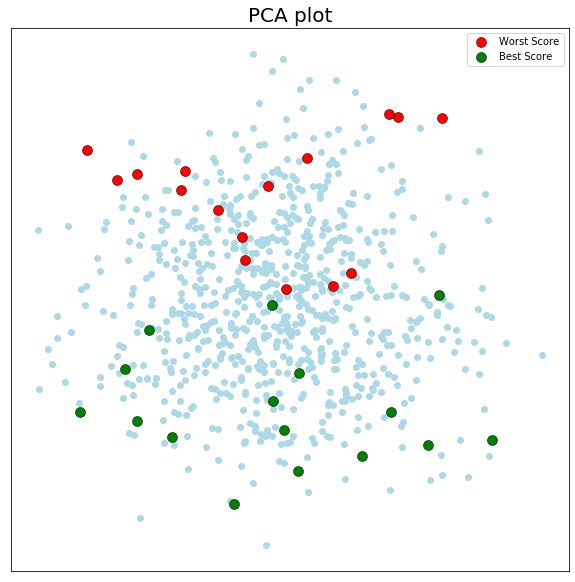

In [16]:
plt.figure(figsize=(10,10))
plt.title('PCA plot', size=20)
plt.scatter(x=xco, y=yco,c='#ADD8E6')
plt.scatter(x=worstxco, y=worstyco,c='r',lw=0.5,s=100,edgecolors='k',label="Worst Score")
plt.scatter(x=winnersxco, y=winnersyco,c='green',lw=0.5,s=100,edgecolors='k',label="Best Score")
plt.xticks([], [])
plt.yticks([], [])
plt.legend()

## TSNE

In [17]:
tsne = manifold.TSNE(n_components=2, init='random',
                         random_state=0, perplexity=30, learning_rate=500)
tsne_res = tsne.fit_transform(Y_sklearn)

In [18]:
worstco = [] 

for i in max_indexes:
    worstco.append(tsne_res[i])
    
worstxco, worstyco = zip(*worstco)

In [19]:
winnersco = [] 

for i in min_indexes:
    winnersco.append(tsne_res[i])
    
winnersxco, winnersyco = zip(*winnersco)

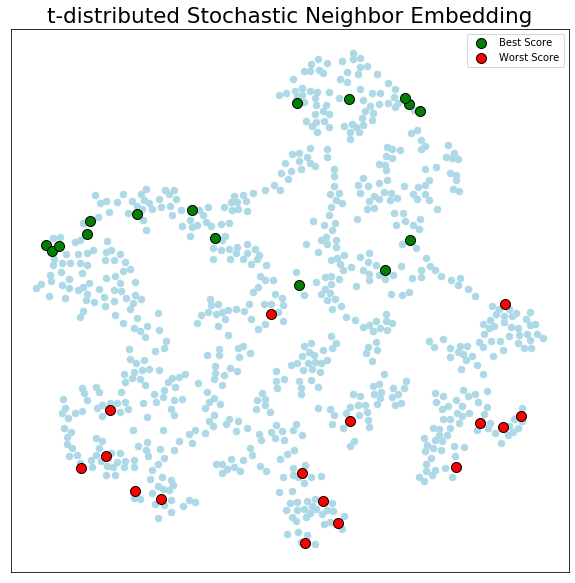

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(tsne_res[:, 0], tsne_res[:, 1],lw=0.5,s=50,c='#ADD8E6')
plt.scatter(winnersxco, winnersyco,c='green',s=100,edgecolors='k',label="Best Score")
plt.scatter(worstxco, worstyco,c='r',s=100,edgecolors='k',label="Worst Score")
plt.title('t-distributed Stochastic Neighbor Embedding',size=21.5)
plt.xticks([], [])
plt.yticks([], [])
plt.legend()
plt.show()

## Multi-Dimensional Scaling

In [21]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
                   dissimilarity="euclidean", n_jobs=1, random_state=10)
pos = mds.fit(Y_sklearn).embedding_

In [22]:
worstco = [] 

for i in max_indexes:
    worstco.append(pos[i])
    
worstxco, worstyco = zip(*worstco)

In [23]:
winnersco = [] 

for i in min_indexes:
    winnersco.append(pos[i])
    
winnersxco, winnersyco = zip(*winnersco)

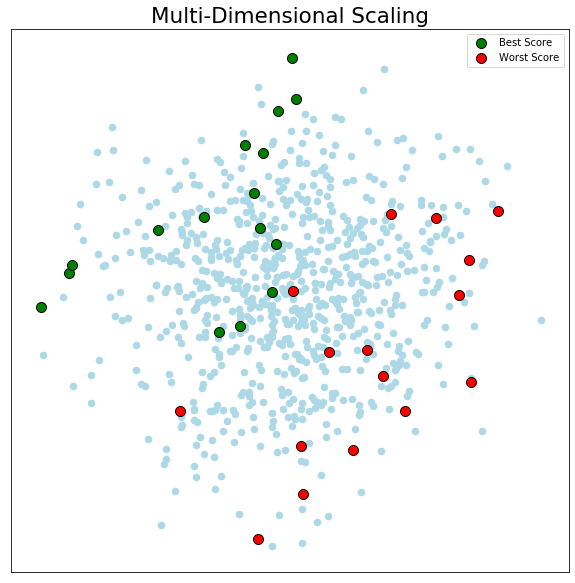

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(pos[:, 0], pos[:, 1], lw=0.5,s=50,c='#ADD8E6')
plt.scatter(winnersxco, winnersyco,c='green',s=100,edgecolors='k',label="Best Score")
plt.scatter(worstxco, worstyco,c='r',s=100,edgecolors='k',label="Worst Score")
plt.title('Multi-Dimensional Scaling',size=21.5)
plt.xticks([], [])
plt.yticks([], [])
plt.legend()
plt.show()

# Train & Test sets

In [25]:
X_train = norm_df[['avg_driv_dist', 'driv_acc', 'gir', 'scrambling','sandsaves', 'putting_avg']]
y_train = df['score']

In [26]:
X = norm_df2021[['avg_driv_dist', 'driv_acc', 'gir', 'scrambling','sandsaves', 'putting_avg']]
y = df2021['score']

# ML Models

## Linear Regression Model

In [27]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
predictions2021 = regr.predict(X).round()
df = pd.DataFrame({'Actual': y, 'Predicted': predictions2021})
df.head(10)

,Actual,Predicted
0,1,7.0
1,5,7.0
2,4,5.0
3,-6,-0.0
4,4,3.0
5,0,-2.0
6,2,2.0
7,7,4.0
8,-7,-3.0
9,11,12.0


In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions2021))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions2021))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,predictions2021)))

Mean Absolute Error: 2.423076923076923
Mean Squared Error: 8.461538461538462
Root Mean Squared Error: 2.908872369413698


### Predicted Top 10 vs Actual Top 10

In [29]:
pred_df = pd.DataFrame({'Actual': y, 'Predicted': predictions2021})
real_df = pred_df.sort_values(by='Actual').head(10)
real_df['Player'] = real_df.index
names = pd.read_csv("2021_with_names.csv")
names['Player'] = names['Unnamed: 0.1']
player_dict = names['Player'].to_dict()
real_df['Player'] = real_df['Player'].map(player_dict)
real_df[['Player','Actual','Predicted']]

,Player,Actual,Predicted
45,Hideki Matsuyama,-10,-7.0
23,Will Zalatoris,-9,-5.0
39,Jordan Spieth,-7,-6.0
8,Xander Schauffele,-7,-3.0
30,Marc Leishman,-6,-5.0
3,Jon Rahm,-6,-0.0
42,Justin Rose,-5,-2.0
32,Corey Conners,-4,0.0
18,Patrick Reed,-4,-3.0
10,Tony Finau,-3,2.0


In [30]:
predictions_df = pred_df.sort_values(by='Predicted').head(10)
predictions_df['Player'] = predictions_df.index
predictions_df['Player'] = predictions_df['Player'].map(player_dict)
predictions_df[['Player','Actual','Predicted']]

,Player,Actual,Predicted
45,Hideki Matsuyama,-10,-7.0
39,Jordan Spieth,-7,-6.0
23,Will Zalatoris,-9,-5.0
30,Marc Leishman,-6,-5.0
8,Xander Schauffele,-7,-3.0
18,Patrick Reed,-4,-3.0
40,Kevin Na,-2,-2.0
48,Webb Simpson,-2,-2.0
29,Cameron Smith,-3,-2.0
42,Justin Rose,-5,-2.0


### Feature Importance

Feature: 0, Score: 2.19103
Feature: 1, Score: 1.92990
Feature: 2, Score: -12.63105
Feature: 3, Score: -8.36047
Feature: 4, Score: -1.62326
Feature: 5, Score: 12.51391


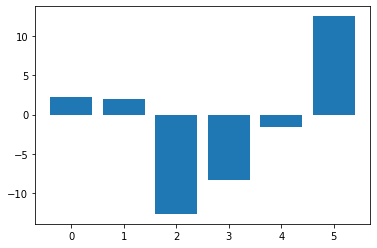

In [31]:
from matplotlib import pyplot
# get importance
importance = regr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Neural Network

### Sigmoid (logistic)

In [32]:
model = MLPRegressor(activation='logistic')
model.fit(X_train, y_train)
predictions2021 = model.predict(X).round()
pred_df = pd.DataFrame({'Actual': y, 'Predicted': predictions2021})
pred_df.head()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Actual,Predicted
0,1,5.0
1,5,5.0
2,4,5.0
3,-6,-1.0
4,4,2.0


In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions2021))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions2021))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,predictions2021)))

Mean Absolute Error: 2.519230769230769
Mean Squared Error: 8.903846153846153
Root Mean Squared Error: 2.983931325256356


In [34]:
model.get_params()

{'activation': 'logistic',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

### Tanh

In [35]:
model = MLPRegressor(activation='tanh')
model.fit(X_train, y_train)
predictions2021 = model.predict(X).round()
pred_df = pd.DataFrame({'Actual': y, 'Predicted': predictions2021})
pred_df.head(10)

,Actual,Predicted
0,1,7.0
1,5,7.0
2,4,5.0
3,-6,-0.0
4,4,3.0
5,0,-2.0
6,2,2.0
7,7,4.0
8,-7,-3.0
9,11,12.0


In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions2021))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions2021))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,predictions2021)))

Mean Absolute Error: 2.4423076923076925
Mean Squared Error: 8.51923076923077
Root Mean Squared Error: 2.9187721338314114


### Relu

In [37]:
model = MLPRegressor(activation='relu')
model.fit(X_train, y_train)
predictions2021 = model.predict(X).round()
pred_df = pd.DataFrame({'Actual': y, 'Predicted': predictions2021})
pred_df.head(10)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Actual,Predicted
0,1,7.0
1,5,6.0
2,4,5.0
3,-6,-0.0
4,4,3.0
5,0,-2.0
6,2,2.0
7,7,4.0
8,-7,-3.0
9,11,11.0


In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions2021))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions2021))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,predictions2021)))

Mean Absolute Error: 2.4615384615384617
Mean Squared Error: 8.884615384615385
Root Mean Squared Error: 2.9807071953842406
